In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline


In [2]:
#for printing full numpy array
np.set_printoptions(threshold=np.inf)
#for printing till 3 decimal places
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})



In [3]:
df1=pd.read_csv("train.csv")

In [4]:
df_t1=pd.read_csv('test.csv')

In [5]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### dropping PassengerId

In [9]:
df2=df1.drop('PassengerId',axis=1)

In [12]:
df2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


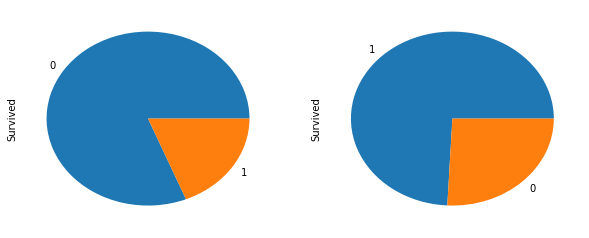

In [39]:
fig=plt.figure(figsize=(10,4))
fig.add_subplot(121)
df2.Survived[df2['Sex']=='male'].value_counts().plot(kind='pie')
fig.add_subplot(122)
df2.Survived[df2['Sex']=='female'].value_counts().plot(kind='pie')



In [43]:
from sklearn.preprocessing import LabelEncoder
df2['Sex']=LabelEncoder().fit_transform(df2['Sex'])
#since sex can be either 0 or 1, no need of oneHotEncoding or dummy variable trap

### getting titles from names

In [63]:
df2['Name']=df2['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())

titles=df2['Name'].unique()
print(titles)

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


# filling the age, titlewise

In [91]:
df2['Age'].fillna(-1, inplace=True)

medians = dict()
for title in titles:
    median = df2.Age[(df2['Age'] != -1)&(df2['Name'] ==title)].median()
    medians[title]=median
    
for index, row in df2.iterrows():
    if row['Age'] == -1:
        df2.loc[index,'Age'] = medians[row['Name']]

In [92]:
df2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,S
4,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,S



### checking which titles are affecting the outcome

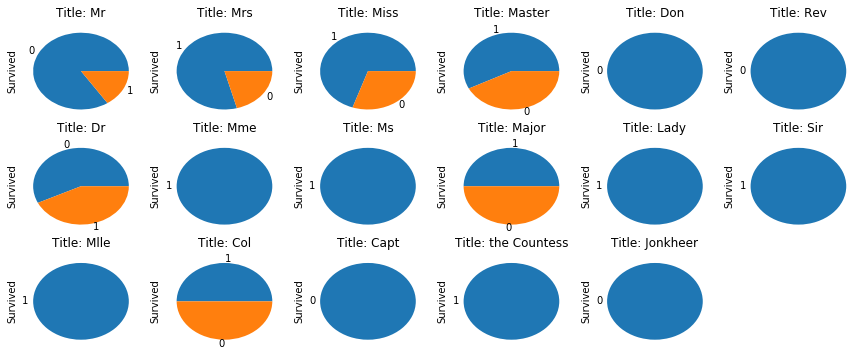

In [96]:
fig=plt.figure(figsize=(15,6))

i=1
for title in df2['Name'].unique():
    fig.add_subplot(3,6,i)
    plt.title('Title: {}'.format(title))
    df2.Survived[df2['Name']==title].value_counts().plot(kind='pie')
    i+=1

In [278]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [279]:
df_t1.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [280]:
#complete Ignore PassengerId,Name,

#maybe ticket,cabin

df2=df1[['Pclass','Sex','Age','SibSp','Parch','Fare', 'Embarked','Survived']]


In [281]:
df_t2=df_t1[['Pclass','Sex','Age','SibSp','Parch','Fare', 'Embarked']]


In [1]:
'''

age mean
embark would be interesting

'''

'\n\nage mean\nembark would be interesting\n\n'

In [286]:
#df_t3=df_t2.dropna(axis=0)
df_t3=df_t2.fillna(df_t2.mean()['Age'])

In [293]:
X_t=df_t3.iloc[:,0:7].values

In [298]:
#one hot encoding

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

labelencoder_X_2 = LabelEncoder()
X[:, 6] = labelencoder_X_2.fit_transform(X[:, 6])


labelencoder_X_t1 = LabelEncoder()
X_t[:, 1] = labelencoder_X_t1.fit_transform(X_t[:, 1])

labelencoder_X_t2 = LabelEncoder()
X_t[:, 6] = labelencoder_X_t2.fit_transform(X_t[:, 6])

onehotencoder = OneHotEncoder(categorical_features = [6])
X = onehotencoder.fit_transform(X).toarray()
#avoiding the dummy variable trap
X = X[:, 1:]

onehotencoder_t = OneHotEncoder(categorical_features = [6])
X_t = onehotencoder_t.fit_transform(X_t).toarray()
#avoiding the dummy variable trap
X_t = X_t[:, 1:]

In [315]:
import pandas as pd
from pprint import pprint
from sklearn import preprocessing, cross_validation, neighbors
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import ExtraTreesClassifier
#from sklearn import svm
#from sklearn.neural_network import MLPClassifier
#from sklearn import linear_model
#from sklearn.linear_model import SGDClassifier
#from sknn.mlp import Classifier, Layer
import numpy as np
import pickle
#from sklearn import linear_model
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2
#from sklearn import linear_model
#from sklearn.neighbors.nearest_centroid import NearestCentroid
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import GaussianNB
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [316]:
#logistic regression 0.2 test set

#train train split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

#normalization

#question, will fitting a numpy array to pandas cause any issue

rob_scaler=sklearn.preprocessing.RobustScaler()
rob_scaled=rob_scaler.fit(X)
x_rob_scaled=rob_scaled.transform(X_train)
df_rob_normalized=pd.DataFrame(x_rob_scaled)
Ip=df_rob_normalized.values
Op=y_train

### training

logreg=LogisticRegression(C=1.5,random_state=1,n_jobs=100)
logreg.fit(Ip,Op)
bias=logreg.score(Ip,Op)
variance=logreg.score(X_test,y_test)
print("Bias is: "+ str(bias))
print("Variance is: "+ str(variance))

Bias is: 0.799648506151
Variance is: 0.573426573427


C:\Users\apakrash\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 100.
  " = {}.".format(self.n_jobs))


In [317]:
#logistic regression 0.2 test set

#train train split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

#normalization

#question, will fitting a numpy array to pandas cause any issue

rob_scaler=sklearn.preprocessing.RobustScaler()
rob_scaled=rob_scaler.fit(X)
x_rob_scaled=rob_scaled.transform(X_train)
df_rob_normalized=pd.DataFrame(x_rob_scaled)
Ip=df_rob_normalized.values
Op=y_train



### training

logreg=LogisticRegression(C=1.5,random_state=1,n_jobs=100)
logreg.fit(Ip,Op)
bias=logreg.score(Ip,Op)
variance=logreg.score(X_test,y_test)
print("Bias is: "+ str(bias))
print("Variance is: "+ str(variance))

Bias is: 0.823293172691
Variance is: 0.593457943925


C:\Users\apakrash\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 100.
  " = {}.".format(self.n_jobs))


In [318]:
## final test set normalization

x_rob_scaled_t=rob_scaled.transform(X_t)
df_rob_normalized_t=pd.DataFrame(x_rob_scaled_t)
Ip_t=df_rob_normalized_t.values

In [319]:
#randomForest

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
rob_scaler=sklearn.preprocessing.RobustScaler()
rob_scaled=rob_scaler.fit(X_train)
x_rob_scaled=rob_scaled.transform(X_train)
df_rob_normalized=pd.DataFrame(x_rob_scaled)
Ip=df_rob_normalized.values
Op=y_train

x_test_normalized=rob_scaled.transform(X_test)
x_test_rob_normalized_df=pd.DataFrame(x_test_normalized)
x_test_values=x_test_rob_normalized_df.values

rf=RandomForestClassifier(n_estimators=125,max_depth=36,random_state=1)
rf.fit(Ip,Op)
bias=rf.score(Ip,Op)
variance=rf.score(x_test_values,y_test)
print("Bias is: "+ str(bias))
print("Variance is: "+ str(variance))
#y_pred=rf.predict(x_test_values)

Bias is: 0.993975903614
Variance is: 0.757009345794


In [252]:
#playing with number of trees

#trees  100 to 1000

for i in range(100,1000,100):
    print('trees '+str(i))
    rf=RandomForestClassifier(n_estimators=i,max_depth=36,random_state=1)
    rf.fit(Ip,Op)
    bias=rf.score(Ip,Op)
    variance=rf.score(x_test_values,y_test)
    print("\tBias is: "+ str(bias))
    print("\tVariance is: "+ str(variance))

trees 100
	Bias is: 0.993975903614
	Variance is: 0.757009345794
trees 200
	Bias is: 0.993975903614
	Variance is: 0.752336448598
trees 300
	Bias is: 0.993975903614
	Variance is: 0.747663551402
trees 400
	Bias is: 0.993975903614
	Variance is: 0.742990654206
trees 500
	Bias is: 0.993975903614
	Variance is: 0.757009345794
trees 600
	Bias is: 0.993975903614
	Variance is: 0.752336448598
trees 700
	Bias is: 0.993975903614
	Variance is: 0.761682242991
trees 800
	Bias is: 0.993975903614
	Variance is: 0.761682242991
trees 900
	Bias is: 0.993975903614
	Variance is: 0.766355140187


In [163]:
#playing with number of trees

#trees n 1000 to 2000

for i in range(1000,2000,100):
    print('trees '+str(i))
    rf=RandomForestClassifier(n_estimators=i,max_depth=36,random_state=1)
    rf.fit(Ip,Op)
    bias=rf.score(Ip,Op)
    variance=rf.score(x_test_values,y_test)
    print("\tBias is: "+ str(bias))
    print("\tVariance is: "+ str(variance))

trees 1000
	Bias is: 0.993975903614
	Variance is: 0.761682242991
trees 1100
	Bias is: 0.993975903614
	Variance is: 0.766355140187
trees 1200
	Bias is: 0.993975903614
	Variance is: 0.766355140187
trees 1300
	Bias is: 0.993975903614
	Variance is: 0.761682242991
trees 1400
	Bias is: 0.993975903614
	Variance is: 0.761682242991
trees 1500
	Bias is: 0.993975903614
	Variance is: 0.761682242991
trees 1600
	Bias is: 0.993975903614
	Variance is: 0.761682242991
trees 1700
	Bias is: 0.993975903614
	Variance is: 0.761682242991
trees 1800
	Bias is: 0.993975903614
	Variance is: 0.761682242991
trees 1900
	Bias is: 0.993975903614
	Variance is: 0.761682242991


In [320]:
#tree 900 is the best

rf=RandomForestClassifier(n_estimators=900,max_depth=36,random_state=1)
rf.fit(Ip,Op)
bias=rf.score(Ip,Op)
variance=rf.score(x_test_values,y_test)
print("\tBias is: "+ str(bias))
print("\tVariance is: "+ str(variance))
y_rf=rf.predict(Ip_t)

	Bias is: 0.993975903614
	Variance is: 0.766355140187


In [158]:
#playing with number of trees

#trees n 900 to 1000 give best results

for n_estimators in range(900,1000,10):
    print('trees '+str(n_estimators))
    rf=RandomForestClassifier(n_estimators,max_depth=36,random_state=1)
    rf.fit(Ip,Op)
    bias=rf.score(Ip,Op)
    variance=rf.score(x_test_values,y_test)
    print("\tBias is: "+ str(bias))
    print("\tVariance is: "+ str(variance))

trees 900
	Bias is: 0.993975903614
	Variance is: 0.761682242991
trees 910
	Bias is: 0.993975903614
	Variance is: 0.757009345794
trees 920
	Bias is: 0.993975903614
	Variance is: 0.757009345794
trees 930
	Bias is: 0.993975903614
	Variance is: 0.757009345794
trees 940
	Bias is: 0.993975903614
	Variance is: 0.761682242991
trees 950
	Bias is: 0.993975903614
	Variance is: 0.761682242991
trees 960
	Bias is: 0.993975903614
	Variance is: 0.757009345794
trees 970
	Bias is: 0.993975903614
	Variance is: 0.757009345794
trees 980
	Bias is: 0.993975903614
	Variance is: 0.757009345794
trees 990
	Bias is: 0.993975903614
	Variance is: 0.761682242991


### 900 trees give best answer

In [154]:
# random forest with AdaBoost, bad result

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

#normalization

#question, will fitting a numpy array to pandas cause any issue

rob_scaler=sklearn.preprocessing.RobustScaler()
rob_scaled=rob_scaler.fit(X)
x_rob_scaled=rob_scaled.transform(X_train)
df_rob_normalized=pd.DataFrame(x_rob_scaled)
Ip=df_rob_normalized.values
Op=y_train

x_test_normalized=rob_scaled.transform(X_test)
x_test_rob_normalized_df=pd.DataFrame(x_test_normalized)
x_test_values=x_test_rob_normalized_df.values


rf=RandomForestClassifier(n_estimators=900,max_depth=40, oob_score = "TRUE", n_jobs = 5,random_state =50 ,max_features = 'sqrt', min_samples_leaf = 50)
#rf.fit(Ip,Op)
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, base_estimator=rf,learning_rate=0.001)
clf.fit(Ip,Op)
bias=clf.score(Ip,Op)
variance=clf.score(X_test,y_test)
print("Bias is: "+ str(bias))
print("Variance is: "+ str(variance))


Bias is: 0.781124497992
Variance is: 0.584112149533


In [167]:
print(X.shape)
print(y.shape)

(712, 8)
(712,)


In [321]:
#mlpc


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
rob_scaler=sklearn.preprocessing.RobustScaler()
rob_scaled=rob_scaler.fit(X_train)
x_rob_scaled=rob_scaled.transform(X_train)
df_rob_normalized=pd.DataFrame(x_rob_scaled)
Ip=df_rob_normalized.values
Op=y_train

x_test_normalized=rob_scaled.transform(X_test)
x_test_rob_normalized_df=pd.DataFrame(x_test_normalized)
x_test_values=x_test_rob_normalized_df.values

mlpc= MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(4,5), random_state=1)
mlpc.fit(Ip,Op)
bias=mlpc.score(Ip,Op)
variance=mlpc.score(x_test_values,y_test)
print("Bias is: "+ str(bias))
print("Variance is: "+ str(variance))
y_pred=mlpc.predict(x_test_values)

Bias is: 0.796133567663
Variance is: 0.811188811189


C:\Users\apakrash\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [175]:
y

AttributeError: 'int' object has no attribute 'shape'

In [184]:
for a in range(1,10,1):
    for b in range(1,10,1):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
        rob_scaler=sklearn.preprocessing.RobustScaler()
        rob_scaled=rob_scaler.fit(X_train)
        x_rob_scaled=rob_scaled.transform(X_train)
        df_rob_normalized=pd.DataFrame(x_rob_scaled)
        Ip=df_rob_normalized.values
        Op=y_train

        x_test_normalized=rob_scaled.transform(X_test)
        x_test_rob_normalized_df=pd.DataFrame(x_test_normalized)
        x_test_values=x_test_rob_normalized_df.values

        mlpc= MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(a,b), random_state=1)
        mlpc.fit(Ip,Op)
        bias=mlpc.score(Ip,Op)
        variance=mlpc.score(x_test_values,y_test)
        print(str(a)+','+str(b))
        print("Bias is: "+ str(bias))
        print("Variance is: "+ str(variance))
        #y_pred=mlpc.predict(x_test_values)

1,1
Bias is: 0.601054481547
Variance is: 0.573426573427


C:\Users\apakrash\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1,2
Bias is: 0.398945518453
Variance is: 0.426573426573
1,3
Bias is: 0.797891036907
Variance is: 0.804195804196
1,4
Bias is: 0.601054481547
Variance is: 0.573426573427
1,5
Bias is: 0.81546572935
Variance is: 0.832167832168
1,6
Bias is: 0.81546572935
Variance is: 0.839160839161
1,7
Bias is: 0.813708260105
Variance is: 0.832167832168
1,8
Bias is: 0.810193321617
Variance is: 0.825174825175
1,9
Bias is: 0.806678383128
Variance is: 0.825174825175
2,1
Bias is: 0.599297012302
Variance is: 0.573426573427
2,2
Bias is: 0.748681898067
Variance is: 0.748251748252
2,3
Bias is: 0.787346221441
Variance is: 0.79020979021
2,4
Bias is: 0.796133567663
Variance is: 0.797202797203
2,5
Bias is: 0.796133567663
Variance is: 0.769230769231
2,6
Bias is: 0.797891036907
Variance is: 0.811188811189
2,7
Bias is: 0.773286467487
Variance is: 0.804195804196
2,8
Bias is: 0.782073813708
Variance is: 0.741258741259
2,9
Bias is: 0.79086115993
Variance is: 0.783216783217
3,1
Bias is: 0.456942003515
Variance is: 0.447552447

In [ ]:
#8,3 variance 0.839160839161

In [322]:
#using 8,3

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
rob_scaler=sklearn.preprocessing.RobustScaler()
rob_scaled=rob_scaler.fit(X_train)
x_rob_scaled=rob_scaled.transform(X_train)
df_rob_normalized=pd.DataFrame(x_rob_scaled)
Ip=df_rob_normalized.values
Op=y_train

x_test_normalized=rob_scaled.transform(X_test)
x_test_rob_normalized_df=pd.DataFrame(x_test_normalized)
x_test_values=x_test_rob_normalized_df.values



mlpc= MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(8,3), random_state=1)
mlpc.fit(Ip,Op)
bias=mlpc.score(Ip,Op)
variance=mlpc.score(x_test_values,y_test)
print("Bias is: "+ str(bias))
print("Variance is: "+ str(variance))
y_mlpc=mlpc.predict(Ip_t)

Bias is: 0.80316344464
Variance is: 0.839160839161


C:\Users\apakrash\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [338]:





from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

for i in range(100,1000,100):
    clf = AdaBoostClassifier(n_estimators=i)
    scores = cross_val_score(clf, Ip,Op)
    print(str(i)+'\t'+str(scores.mean())) 
   


100	0.778631764597
200	0.775104427736
300	0.76455026455
400	0.759296389121
500	0.757523438225
600	0.75226028033
700	0.75226028033
800	0.748751508401
900	0.74698783997


In [339]:
adaclf = AdaBoostClassifier(n_estimators=300)
scores = cross_val_score(adaclf, Ip,Op)
print(str(i)+'\t'+str(scores.mean())) 
   


adaclf.fit(Ip,Op)
bias=adaclf.score(Ip,Op)
variance=adaclf.score(x_test_values,y_test)
print("Bias is: "+ str(bias))
print("Variance is: "+ str(variance))
y_ada=adaclf.predict(Ip_t)

900	0.76455026455
Bias is: 0.866432337434
Variance is: 0.769230769231


In [333]:
for i in range(100,1000,100):
    print(str(i)+'\t'+str(adaBoost(i)))

TypeError: AdaBoostClassifier with algorithm='SAMME.R' requires that the weak learner supports the calculation of class probabilities with a predict_proba method.
Please change the base estimator or set algorithm='SAMME' instead.

In [325]:
np.savetxt('test_rf.csv',y_rf,fmt='%.0f',delimiter=',')

In [326]:
np.savetxt('test_mlpc.csv',y_mlpc,fmt='%.0f',delimiter=',')

In [340]:
np.savetxt('test_adaclf.csv',y_ada,fmt='%.0f',delimiter=',')